## BUAN 6340_Project_1

In [1]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd

#### Q1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
bt = pd.read_csv('Batting.csv')
bt.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


#### Q2) Print out the dimensions and info about the dataframe you just created

In [3]:
bt.info()  # Concise summary about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [4]:
bt.shape  # returns dimension of the dataframe

(102816, 25)

In [5]:
bt.size   # returns number of elements in the dataframe

2570400

#### Q3) How many players have hit 40 or more HRs in one single season? (Number only)

In [6]:
# dataframe 'yp' is created by grouping yearID, playerID, nameFirst and nameLast
yp = bt.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'], as_index = False)['HR'].sum()
ng = yp[yp['HR'] >= 40]
ng.shape[0]

330

#### Q4) How many players have hit more than 600 HRs for their career? (Dataframe)

In [7]:
# dataframe 'pl' is created by grouping playerID, nameFirst, nameLast and birthYear
pl = bt.groupby(['playerID','nameFirst','nameLast','birthYear'], as_index = False)['HR'].sum()
pl[pl['HR']>600]

,playerID,nameFirst,nameLast,birthYear,HR
1,aaronha01,Hank,Aaron,1934,755
1542,bondsba01,Barry,Bonds,1964,762
6633,griffke02,Ken,Griffey,1969,630
10857,mayswi01,Willie,Mays,1931,660
14528,rodrial01,Alex,Rodriguez,1975,696
14865,ruthba01,Babe,Ruth,1895,714
16103,sosasa01,Sammy,Sosa,1968,609
17004,thomeji01,Jim,Thome,1970,612


#### Q5) How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [8]:
yp1 = bt.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'], as_index = False)['HR','H','3B','2B'].sum()
q5 = yp1[(yp1['HR'] >= 30) & (yp1['H'] >= 200) & (yp1['3B'] >= 10) & (yp1['2B'] >= 40)]
q5.shape[0]

16

#### Q6) How many players have had 100 or more SBs in a season? (Dataframe)

In [9]:
yp2 = bt.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'], as_index = False)['SB'].sum()
yp2[yp2['SB']>=100]

,yearID,playerID,nameFirst,nameLast,birthYear,SB
3138,1887,brownpe01,Pete,Browning,1861,103.0
3165,1887,comisch01,Charlie,Comiskey,1859,117.0
3209,1887,fogarji01,Jim,Fogarty,1864,102.0
3275,1887,lathaar01,Arlie,Latham,1860,129.0
3322,1887,nicolhu01,Hugh,Nicol,1858,138.0
3414,1887,wardjo01,John,Ward,1860,111.0
3609,1888,lathaar01,Arlie,Latham,1860,109.0
3645,1888,nicolhu01,Hugh,Nicol,1858,103.0
3903,1889,hamilbi01,Billy,Hamilton,1866,111.0
4276,1890,hamilbi01,Billy,Hamilton,1866,102.0


#### Q7) How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [10]:
yp = yp.set_index('yearID')   # 'year_ID' is set as an index for dataframe 'yp'

In [11]:
q7 = yp.loc[1960:1969]
pla = q7.groupby(['playerID','nameFirst','nameLast','birthYear'], as_index = False)['HR'].sum()
pla[pla['HR'] > 200]

,playerID,nameFirst,nameLast,birthYear,HR
0,aaronha01,Hank,Aaron,1934,375
19,allisbo01,Bob,Allison,1934,225
70,bankser01,Ernie,Banks,1931,269
279,cashno01,Norm,Cash,1934,278
283,cepedor01,Orlando,Cepeda,1937,254
323,colavro01,Rocky,Colavito,1933,245
751,howarfr01,Frank,Howard,1936,288
830,kalinal01,Al,Kaline,1934,210
856,killeha01,Harmon,Killebrew,1936,393
1009,mantlmi01,Mickey,Mantle,1931,256


#### Q8) Who has hit the most HRs in history? (Dataframe)

In [12]:
pl.sort_values('HR',ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,HR
1542,bondsba01,Barry,Bonds,1964,762


#### Q9) Who had the most hits in the 1970s? (Dataframe)

In [13]:
yp3 = bt.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'], as_index = False)['H'].sum()
yp3 = yp3.set_index('yearID') 
q9 = yp3.loc[1970]    # dataframe 'q9' is created with index yearID = 1970
q9.sort_values('H',ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,H
yearID,,,,,
1970,rosepe01,Pete,Rose,1941,205


#### Q10) Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977? (Dataframe)

In [14]:
# OBP = (H + BB + IBB + SH + SF)/AB
# PA = AB + BB + IBB + SH + SF
# Average = H/AB
yp4 = bt.groupby(['yearID','playerID','nameFirst','nameLast'], as_index = False)['H','BB','IBB','SH','SF','AB'].sum()
yp4 = yp4.set_index('yearID') 

yp4['OBP'] = (yp4['H']+yp4['BB']+yp4['IBB']+yp4['SH']+yp4['SF'])/yp4['AB']
yp4['PA'] = yp4['AB']+yp4['BB']+yp4['IBB']+yp4['SH']+yp4['SF']
yp4['AVG'] = yp4['H']/yp4['AB']
yp4.head()

,playerID,nameFirst,nameLast,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,
1871,abercda01,Frank,Abercrombie,0,0,NaN,NaN,NaN,4,NaN,NaN,0.000000
1871,addybo01,Bob,Addy,32,4,NaN,NaN,NaN,118,NaN,NaN,0.271186
1871,allisar01,Art,Allison,40,2,NaN,NaN,NaN,137,NaN,NaN,0.291971
1871,allisdo01,Doug,Allison,44,0,NaN,NaN,NaN,133,NaN,NaN,0.330827
1871,ansonca01,Cap,Anson,39,2,NaN,NaN,NaN,120,NaN,NaN,0.325000


In [15]:
q10 = yp4.loc[1977]   # dataframe 'q10' is created with index yearID = 1977
q10[q10['PA'] >=500].sort_values('OBP', ascending = False).head()

,playerID,nameFirst,nameLast,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,
1977,singlke01,Ken,Singleton,176,107,13.0,0.0,6.0,536,0.563433,662.0,0.328358
1977,smithre06,Reggie,Smith,150,104,11.0,1.0,7.0,488,0.559426,611.0,0.307377
1977,tenacge01,Gene,Tenace,102,125,10.0,2.0,4.0,437,0.556064,578.0,0.233410
1977,hargrmi01,Mike,Hargrove,160,103,7.0,8.0,6.0,525,0.540952,649.0,0.304762
1977,carewro01,Rod,Carew,239,69,15.0,1.0,5.0,616,0.534091,706.0,0.387987


#### Q11) Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [16]:
q11 = yp4.loc[2013]   # dataframe 'q11' is created with index yearID = 2013
q11[q11['PA'] >=300].sort_values('AVG', ascending = False).head(8)

,playerID,nameFirst,nameLast,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,
2013,cabremi01,Miguel,Cabrera,193,90,19.0,0.0,2.0,555,0.547748,666.0,0.347748
2013,ramirha01,Hanley,Ramirez,105,27,3.0,0.0,2.0,304,0.450658,336.0,0.345395
2013,cuddymi01,Michael,Cuddyer,162,46,5.0,0.0,3.0,489,0.441718,543.0,0.331288
2013,mauerjo01,Joe,Mauer,144,61,7.0,0.0,2.0,445,0.480899,515.0,0.323596
2013,troutmi01,Mike,Trout,190,110,10.0,0.0,8.0,589,0.539898,717.0,0.322581
2013,johnsch05,Chris,Johnson,165,29,5.0,0.0,2.0,514,0.391051,550.0,0.321012
2013,freemfr01,Freddie,Freeman,176,66,10.0,0.0,5.0,551,0.466425,632.0,0.319419
2013,puigya01,Yasiel,Puig,122,36,6.0,0.0,3.0,382,0.437173,427.0,0.319372


#### Q12) Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [17]:
q12 = yp3.loc[1940:1949]      # dataframe 'q11' is created from index yearID 1940 to 1950
q12[q12['H'] == q12.groupby(level=[0])['H'].transform(max)]

,playerID,nameFirst,nameLast,birthYear,H
yearID,,,,,
1940,cramedo01,Doc,Cramer,1905,200
1940,mccosba01,Barney,McCosky,1917,200
1940,radclri01,Rip,Radcliff,1906,200
1941,travice01,Cecil,Travis,1913,218
1942,peskyjo01,Johnny,Pesky,1919,205
1943,musiast01,Stan,Musial,1920,220
1944,stirnsn01,Snuffy,Stirnweiss,1918,205
1945,holmeto01,Tommy,Holmes,1917,224
1946,musiast01,Stan,Musial,1920,228


#### Q13) Who led MLB with the most hits the most times? And how many times? (Dataframe, Number)

In [18]:
# 'q13' dataframe is created with the most hits leader in each baseball season
q13 = yp3[yp3['H'] == yp3.groupby(level=[0])['H'].transform(max)]
q13.head()

,playerID,nameFirst,nameLast,birthYear,H
yearID,,,,,
1871,mcveyca01,Cal,McVey,1849,66
1872,barnero01,Ross,Barnes,1850,99
1873,barnero01,Ross,Barnes,1850,137
1874,mcveyca01,Cal,McVey,1849,123
1875,barnero01,Ross,Barnes,1850,143


In [19]:
# To find the player with most hits the most times
player = q13.playerID.value_counts().index[0]
print (player)

cobbty01


In [20]:
# To display the dataframe corresponding to playerID = cobbty01 who lead MLB with most hits the most number of times
mosthits = q13[q13.playerID == 'cobbty01']
mosthits

,playerID,nameFirst,nameLast,birthYear,H
yearID,,,,,
1907,cobbty01,Ty,Cobb,1886,212
1909,cobbty01,Ty,Cobb,1886,216
1911,cobbty01,Ty,Cobb,1886,248
1912,cobbty01,Ty,Cobb,1886,226
1915,cobbty01,Ty,Cobb,1886,208
1917,cobbty01,Ty,Cobb,1886,225
1919,cobbty01,Ty,Cobb,1886,191


In [21]:
# Number of times cobbty01 led the baseball season with most hits
mosthits.shape[0]

7

#### Q14) Which players have played the most games for their careers? Top 5, descending by games played presented as a dataframe

In [22]:
plg = bt.groupby(['playerID','nameFirst','nameLast','birthYear'], as_index = False)['G'].sum()
q14 = plg.sort_values('G',ascending = False).head(5)
q14

,playerID,nameFirst,nameLast,birthYear,G
14719,rosepe01,Pete,Rose,1941,3562
18728,yastrca01,Carl,Yastrzemski,1939,3308
1,aaronha01,Hank,Aaron,1934,3298
7383,henderi01,Rickey,Henderson,1958,3081
3155,cobbty01,Ty,Cobb,1886,3035


#### Q15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs? Just a number is okay here

In [23]:
plh = bt.groupby(['playerID','nameFirst','nameLast','birthYear'], as_index = False)['H','HR'].sum()
q15 = plh[(plh['H'] > 3000) & (plh['HR'] >= 500)]
q15.shape[0]

5

#### Q16) How many HRs were hit during the entire 1988 season? Just a number is okay here

In [24]:
yr = bt.groupby(['yearID'])['HR'].sum()
q16 = yr.loc[1988]   
q16

3180

#### Q17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs. I would like a dataframe sorted by average.

In [25]:
# In baseball, the batting average (BA) is defined by the number of hits divided by at bats.
# It is usually reported to three decimal places and read without the decimal: 
# A player with a batting average of .300 is "batting three-hundred."

In [26]:
wade = yp4[(yp4.nameFirst == 'Wade') & (yp4.nameLast == 'Boggs') & (yp4.AB >= 500)]
q17 = wade.sort_values('AVG',ascending = False).head(3)
q17

,playerID,nameFirst,nameLast,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,
1985,boggswa01,Wade,Boggs,240,96,5.0,3.0,2.0,653,0.529862,759.0,0.367534
1988,boggswa01,Wade,Boggs,214,125,18.0,0.0,7.0,584,0.623288,734.0,0.366438
1987,boggswa01,Wade,Boggs,200,105,19.0,1.0,8.0,551,0.604356,684.0,0.362976


#### Q18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP. I would like a dataframe for this

In [27]:
y1995 = yp4.loc[1995]         # dataframe 'q16' is created with index yearID 1995
y1995[(y1995.PA >=400)].sort_values('OBP', ascending = False).head(3)

,playerID,nameFirst,nameLast,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,
1995,thomafr04,Frank,Thomas,152,136,29.0,0.0,12.0,493,0.667343,670.0,0.308316
1995,martied01,Edgar,Martinez,182,116,19.0,0.0,4.0,511,0.628180,650.0,0.356164
1995,mcgwima01,Mark,McGwire,87,88,5.0,0.0,6.0,317,0.586751,416.0,0.274448


#### Q19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928? I would like a dataframe with just the leader

In [28]:
yp1 = yp1.set_index('yearID') 
q19 = yp1[yp1['3B'] == yp1.groupby(level=[0])['3B'].transform(max)]
q19.loc[[1922, 1925, 1926, 1928]]

,playerID,nameFirst,nameLast,birthYear,HR,H,3B,2B
yearID,,,,,,,,
1922,daubeja01,Jake,Daubert,1884,12,205,22,15
1925,cuyleki01,Kiki,Cuyler,1898,18,220,26,43
1926,wanerpa01,Paul,Waner,1903,8,180,22,35
1928,combsea01,Earle,Combs,1899,7,194,21,33


#### Q20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases? A number is okay here

In [29]:
yp5 = bt.groupby(['yearID','playerID','nameFirst','nameLast','birthYear'], as_index = False)['HR','SB'].sum()
yp5 = yp5.set_index('yearID') 
q20 = yp5[(yp5['HR'] >= 30) & (yp5['SB'] >= 30)]
q20.shape[0]

60

#### Q21) Who had the highest OBP in 1986 with at least 400 PAs? (Dataframe)

In [30]:
y1986 = yp4.loc[1986]
y1986[(y1986.PA >=400)].sort_values('OBP', ascending = False).head(1)

,playerID,nameFirst,nameLast,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,
1986,boggswa01,Wade,Boggs,207,105,14.0,4.0,4.0,580,0.575862,707.0,0.356897


#### Q22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [31]:
# dataframe 'lg' is created by grouping yearID, playerID, nameFirst, nameLast, birthYear and lgID
lg = bt.groupby(['yearID','playerID','nameFirst','nameLast','birthYear','lgID'], as_index = False)['H','BB','IBB','SH','SF','AB'].sum()
lg = lg.set_index('yearID')
lg['OBP'] = (lg['H']+lg['BB']+lg['IBB']+lg['SH']+lg['SF'])/lg['AB']
lg['PA'] = lg['AB']+lg['BB']+lg['IBB']+lg['SH']+lg['SF']
lg['AVG'] = lg['H']/lg['AB']

In [32]:
q22 = lg.loc[1997]   # dataframe 'q22' is created with index yearID 1995
q22[(q22.PA >=400) & (q22.lgID == 'NL')].sort_values('OBP', ascending = False).head(1)

,playerID,nameFirst,nameLast,birthYear,lgID,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,,,
1997,bondsba01,Barry,Bonds,1964,NL,155,145,34.0,0.0,5.0,532,0.637218,716.0,0.291353


#### Q23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [33]:
lg1 = bt.groupby(['yearID','playerID','nameFirst','nameLast','birthYear','lgID'], as_index = False)['HR','H','BB','IBB','SH','SF','AB'].sum()
lg1 = lg1.set_index('yearID')
lg1['OBP'] = (lg1['H']+lg1['BB']+lg1['IBB']+lg1['SH']+lg1['SF'])/lg1['AB']
lg1['PA'] = lg1['AB']+lg1['BB']+lg1['IBB']+lg1['SH']+lg1['SF']
lg1['AVG'] = lg1['H']/lg1['AB']

y2012 = lg1.loc[2012]    # dataframe 'y2012' is created with index yearID 2012
y2012 = y2012[y2012.PA >= 500]   # players with plate appearences less than 500 are filtered out from dataframe y2012

In [34]:
y23 = y2012.groupby(['lgID']).mean()  # dataframe 'y23' is created to get the average HR hit in each league
y23

,birthYear,HR,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
lgID,,,,,,,,,,,
AL,1982.975000,19.450000,147.475000,50.36250,3.875000,1.937500,4.225000,546.450000,0.380403,606.850000,0.269005
NL,1983.419355,19.532258,151.919355,53.66129,4.467742,1.612903,4.403226,547.241935,0.395431,611.387097,0.277707


In [35]:
y2012[((y2012['HR'] > y23.loc['AL','HR']) & (y2012['lgID'] == 'AL')) | ((y2012['HR'] > y23.loc['NL','HR']) & (y2012['lgID'] == 'NL'))]

,playerID,nameFirst,nameLast,birthYear,lgID,HR,H,BB,IBB,SH,SF,AB,OBP,PA,AVG
yearID,,,,,,,,,,,,,,,
2012,alvarpe01,Pedro,Alvarez,1987,NL,30,128,57,6.0,0.0,3.0,525,0.369524,591.0,0.243810
2012,beltrad01,Adrian,Beltre,1979,AL,36,194,36,8.0,0.0,9.0,604,0.408940,657.0,0.321192
2012,beltrca01,Carlos,Beltran,1977,NL,32,147,65,15.0,1.0,4.0,547,0.424132,632.0,0.268739
2012,braunry02,Ryan,Braun,1983,NL,41,191,63,15.0,0.0,5.0,598,0.458194,681.0,0.319398
2012,bruceja01,Jay,Bruce,1987,NL,34,141,62,11.0,0.0,7.0,560,0.394643,640.0,0.251786
2012,butlebi03,Billy,Butler,1986,AL,29,192,54,9.0,0.0,4.0,614,0.421824,681.0,0.312704
2012,cabremi01,Miguel,Cabrera,1983,AL,44,205,66,17.0,0.0,6.0,622,0.472669,711.0,0.329582
2012,canoro01,Robinson,Cano,1982,AL,33,196,61,10.0,0.0,2.0,627,0.429027,700.0,0.312600
2012,cespeyo01,Yoenis,Cespedes,1985,AL,23,142,43,5.0,0.0,3.0,487,0.396304,538.0,0.291581


#### Q24) - Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [36]:
yp = yp.reset_index()     # yearID index is removed from the dataframe 'yp'
yp['Age'] = yp['yearID'] - yp['birthYear']  # Age is calculated based on yearID and birthYear of a player in a season

y1 = yp.groupby(['playerID','yearID']).filter(lambda x: x['HR'].sum() >= 50).sort_values(by='Age', ascending=True)
y1.head(1)

,yearID,playerID,nameFirst,nameLast,birthYear,HR,Age
82621,2007,fieldpr01,Prince,Fielder,1984,50,23


#### Q25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [37]:
y2 = yp.groupby(['playerID']).filter(lambda x: x['HR'].sum() >= 300).sort_values(by='Age', ascending=True)
y2 = y2.drop(['yearID','HR','Age'],axis=1)
y2 = y2.drop_duplicates('playerID')  # duplicate player names are dropped 
y2.head(5)

,playerID,nameFirst,nameLast,birthYear
20088,ottme01,Mel,Ott,1909
19377,foxxji01,Jimmie,Foxx,1907
34532,killeha01,Harmon,Killebrew,1936
28494,hodgegi01,Gil,Hodges,1924
67616,rodrial01,Alex,Rodriguez,1975


### Bonus Questions

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
yr = bt.groupby(['yearID'], as_index = False)['HR'].sum()
yr.head()

,yearID,HR
0,1871,47
1,1872,35
2,1873,46
3,1874,40
4,1875,40


#### Graph total HRs per season using bar graph

Text(0,0.5,'Home Runs')

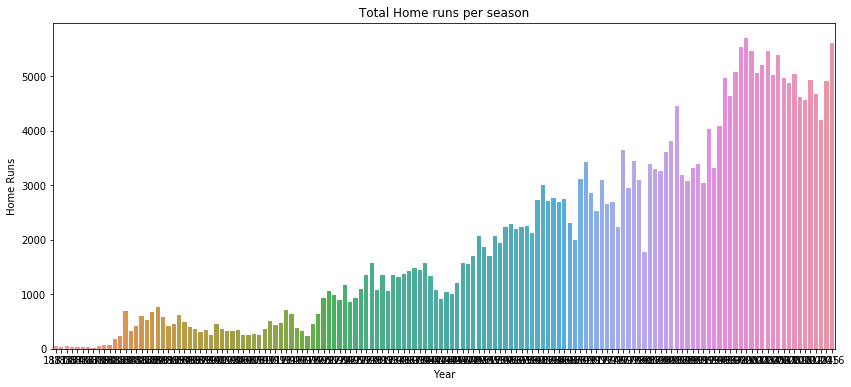

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.barplot(x='yearID', y='HR', data = yr)
plt.title('Total Home runs per season')
plt.xlabel('Year')
plt.ylabel('Home Runs')

#### Using a line graph to graph the average HRs per AB (think about this) per season

In [41]:
bt['HR per AB'] = bt['HR']/bt['AB']
yrm = bt.groupby(['yearID'], as_index = False)['HR per AB'].mean()
yrm.head()

,yearID,HR per AB
0,1871,0.003427
1,1872,0.001386
2,1873,0.001517
3,1874,0.001524
4,1875,0.000651


Text(0,0.5,'Average HRs per AB')

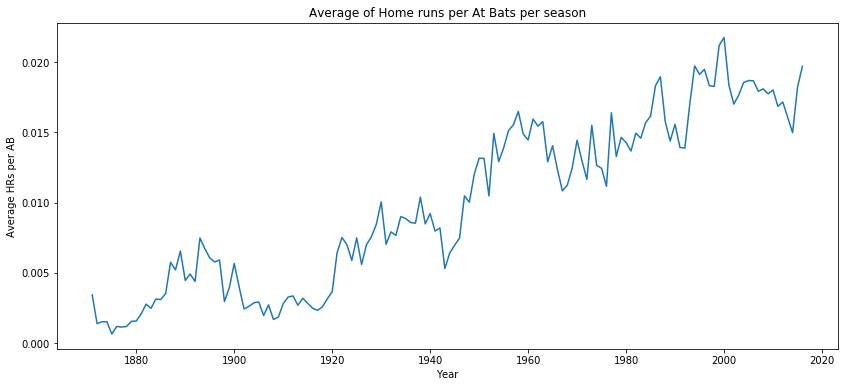

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
plt.plot(yrm['yearID'], yrm['HR per AB'])
plt.title('Average of Home runs per At Bats per season')
plt.xlabel('Year')
plt.ylabel('Average HRs per AB')